# R

## Packages and Graphics

## Packages in R
- Like most scripting languages, `R` has a very robust package ecosystem
- To install a package in `R`, use the `install.packages` function, and pass the name of the package you want to install
- Once a package is installed, you can use it by calling
```
    library(PACKAGE_NAME) #No QUOTES
```

## Package Documentation
- Most major packages in R come with two forms of documentation
    - The manual, which contains the same information that can be accessed through the `?` operator
    - Vingettes, which is a more long form documentation, often written in the style of an academic paper
- Example
    - https://cran.r-project.org/web/packages/psych/psych.pdf
    - https://cran.r-project.org/web/packages/psych/vignettes/intro.pdf
    - https://cran.r-project.org/web/packages/psych/vignettes/overview.pdf
    

## CRAN
- So where do the packages come from when we perform `install.packages`?
- By default the come from CRAN the Comprehensive R Archive Network
    - Most scripting languages have an equivalent, often named similarly (CTAN, CPAN)
- Other package repositories exist and can be used, but if you are using a popular package, it is probably published on CRAN

## Finding Pacakges
- CRAN is great at hosting packages
    - Not great at helping you find packages
- Numerous third party websites exist to help you find a package to accomplish something
    - My personal favorite is https://crantastic.org/

## TidyData
- There are many ways to represent data in a data frame, and due to the history of R, almost all of them are use
- Recently there has been a push to create commonsense conventions, known as having "Tidy Data"
- Hadley Wickham (Major player in R and the tidy data movement) defines tidy data as 
    - Each variable is in a column.
    - Each observation is a row.
    - Each value is a cell.


## TidyR
- To promote and enable this, the package TidyR was released
- It was spawned an entire family of packages, collectively known as the tidyverse
    - You can install just tidyR by using install.packages('tidyR')
    - The entire family can be installed with install.packages('tidyverse')
- It contains many functions meant to manipulate data into a tidy form

## The Pipe Operator
- `TidyR` is commonly presented using the operator `%>%`, which comes from an earlier package, `magrittr`
    - It is very similar to the pipe in bash, passing the output of one function as the first argument to the next function
    - The following are eqiuvalent
    
```R
apply(data,1,function)
      
data %>% apply(1,function)
```

## Spreading
- The `spread` function converts from long data to wide data
- The syntax of the `spread` function is
```R
    spread(data,key,value)
```
    - Key is the column you want to use to form your new columns
    - Value is the column you want to use to fill the cells

In [2]:
library(DSR)
long <- table2
extra_wide_cases <- table4
combined <- table5
print(table2)

       country year        key      value
1  Afghanistan 1999      cases        745
2  Afghanistan 1999 population   19987071
3  Afghanistan 2000      cases       2666
4  Afghanistan 2000 population   20595360
5       Brazil 1999      cases      37737
6       Brazil 1999 population  172006362
7       Brazil 2000      cases      80488
8       Brazil 2000 population  174504898
9        China 1999      cases     212258
10       China 1999 population 1272915272
11       China 2000      cases     213766
12       China 2000 population 1280428583


In [3]:
library(tidyr)
print(as.data.frame(spread(long,key,value)))


Attaching package: ‘tidyr’

The following objects are masked from ‘package:DSR’:

    table1, table2, table3, table5, who



      country year  cases population
1 Afghanistan 1999    745   19987071
2 Afghanistan 2000   2666   20595360
3      Brazil 1999  37737  172006362
4      Brazil 2000  80488  174504898
5       China 1999 212258 1272915272
6       China 2000 213766 1280428583


## Gathering
- Gathering is the opposite of spread
    - While it is uncommon to need this, it is possible someone made a data frame where not every column is a variable, and you need to collapse things a bit
```R
    gather(data, COLUMN_NAME1, COLUMN_NAME2, cols_to_gather)
```

In [5]:
#print(extra_wide_cases)
gathered_cases <- extra_wide_cases %>% gather("Year","Cases",2:3)
print(gathered_cases)

# A tibble: 6 x 3
      country  Year  Cases
       <fctr> <chr>  <int>
1 Afghanistan  1999    745
2      Brazil  1999  37737
3       China  1999 212258
4 Afghanistan  2000   2666
5      Brazil  2000  80488
6       China  2000 213766


## Separating and Uniting
- Separating and Uniting allows us to create multiple columns from one, or bring together columns that should never has been separated
```R
    separate(data,col_to_separate,new_columns)
    unite(data,col_to_add, from_columns)
```

In [13]:
print(table5)
all_good <- table5 %>% unite("year",c("century","year"),sep="") %>%
separate("rate",c("cases",'population'),sep="/")
print(all_good)

# A tibble: 6 x 4
      country century  year              rate
*       <chr>   <chr> <chr>             <chr>
1 Afghanistan      19    99      745/19987071
2 Afghanistan      20    00     2666/20595360
3      Brazil      19    99   37737/172006362
4      Brazil      20    00   80488/174504898
5       China      19    99 212258/1272915272
6       China      20    00 213766/1280428583
# A tibble: 6 x 4
      country  year  cases population
*       <chr> <chr>  <chr>      <chr>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3      Brazil  1999  37737  172006362
4      Brazil  2000  80488  174504898
5       China  1999 212258 1272915272
6       China  2000 213766 1280428583


## DplyR
- DplyR is another package in the tidyverse
    - Improves upon earlier packaged named `plyr`, which allowed easy manipulation of data
    - Specifically designed to use with data frames
- Just like TidyR, commonly uses pipes
- All functions are verbs


## Selecting Data
- DplyR contains two functions to select data
    - Select selects columns/variables
    - Filter selects rows/observations
- Both of these can take a list of names, but they are more useful with built-in functions in DplyR
    - endsWith
    - startsWith
    - contains
    - one_of

In [14]:
library(dplyr)
starwars <- as.data.frame(starwars)
row.names(starwars) <- starwars$name
print(starwars)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



                                       name height   mass    hair_color
Luke Skywalker               Luke Skywalker    172   77.0         blond
C-3PO                                 C-3PO    167   75.0          <NA>
R2-D2                                 R2-D2     96   32.0          <NA>
Darth Vader                     Darth Vader    202  136.0          none
Leia Organa                     Leia Organa    150   49.0         brown
Owen Lars                         Owen Lars    178  120.0   brown, grey
Beru Whitesun lars       Beru Whitesun lars    165   75.0         brown
R5-D4                                 R5-D4     97   32.0          <NA>
Biggs Darklighter         Biggs Darklighter    183   84.0         black
Obi-Wan Kenobi               Obi-Wan Kenobi    182   77.0 auburn, white
Anakin Skywalker           Anakin Skywalker    188   84.0         blond
Wilhuff Tarkin               Wilhuff Tarkin    180     NA  auburn, grey
Chewbacca                         Chewbacca    228  112.0       

In [15]:
## Standard Boring Select
select(starwars,hair_color,skin_color, eye_color)

,hair_color,skin_color,eye_color
Luke Skywalker,blond,fair,blue
C-3PO,NA,gold,yellow
R2-D2,NA,"white, blue",red
Darth Vader,none,white,yellow
Leia Organa,brown,light,brown
Owen Lars,"brown, grey",light,blue
Beru Whitesun lars,brown,light,blue
R5-D4,NA,"white, red",red
Biggs Darklighter,black,light,brown
Obi-Wan Kenobi,"auburn, white",fair,blue-gray


In [16]:
##  Select with Pipes and Ends_with
starwars %>% select(ends_with('color'))

,hair_color,skin_color,eye_color
Luke Skywalker,blond,fair,blue
C-3PO,NA,gold,yellow
R2-D2,NA,"white, blue",red
Darth Vader,none,white,yellow
Leia Organa,brown,light,brown
Owen Lars,"brown, grey",light,blue
Beru Whitesun lars,brown,light,blue
R5-D4,NA,"white, red",red
Biggs Darklighter,black,light,brown
Obi-Wan Kenobi,"auburn, white",fair,blue-gray


In [17]:
starwars %>% select(-name)

,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
Luke Skywalker,172,77,blond,fair,blue,19,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112,NA,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33,NA,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19,female,Alderaan,Human,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith, A New Hope",,
Beru Whitesun lars,165,75,brown,light,blue,47,female,Tatooine,Human,"Attack of the Clones, Revenge of the Sith, A New Hope",,
R5-D4,97,32,NA,"white, red",red,NA,NA,Tatooine,Droid,A New Hope,,
Biggs Darklighter,183,84,black,light,brown,24,male,Tatooine,Human,A New Hope,,X-wing
Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57,male,Stewjon,Human,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",Tribubble bongo,"Jedi starfighter, Trade Federation cruiser, Naboo star skiff, Jedi Interceptor, Belbullab-22 starfighter"


In [20]:
starwars %>% filter(species != "Human")

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
1,C-3PO,167,75,NA,gold,yellow,112,NA,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",,
2,R2-D2,96,32,NA,"white, blue",red,33,NA,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",,
3,R5-D4,97,32,NA,"white, red",red,NA,NA,Tatooine,Droid,A New Hope,,
4,Chewbacca,228,112,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
5,Greedo,173,74,NA,green,black,44,male,Rodia,Rodian,A New Hope,,
6,Jabba Desilijic Tiure,175,1358,NA,"green-tan, brown",orange,600,hermaphrodite,Nal Hutta,Hutt,"The Phantom Menace, Return of the Jedi, A New Hope",,
7,Yoda,66,17,white,green,brown,896,male,NA,Yoda's species,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back",,
8,IG-88,200,140,none,metal,red,15,none,NA,Droid,The Empire Strikes Back,,
9,Bossk,190,113,none,green,red,53,male,Trandosha,Trandoshan,The Empire Strikes Back,,
10,Ackbar,180,83,none,brown mottle,orange,41,male,Mon Cala,Mon Calamari,"Return of the Jedi, The Force Awakens",,


In [21]:
starwars %>% filter(species %in% c('Wookiee','Ewok'))

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
1,Chewbacca,228,112,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
2,Wicket Systri Warrick,88,20,brown,brown,brown,8,male,Endor,Ewok,Return of the Jedi,,
3,Tarfful,234,136,brown,brown,blue,NA,male,Kashyyyk,Wookiee,Revenge of the Sith,,


## Adding or Changing Variables
- The `mutate` and `transmute` functions are used to add new variables as well as update existing ones
    - `mutate` does not drop old variables
    - `transmute` drops everything except those in the function call

In [23]:
starwars %>% mutate( height = height * 0.393701)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
1,Luke Skywalker,67.716572,77,blond,fair,blue,19,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
2,C-3PO,65.748067,75,NA,gold,yellow,112,NA,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",,
3,R2-D2,37.795296,32,NA,"white, blue",red,33,NA,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",,
4,Darth Vader,79.527602,136,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",,TIE Advanced x1
5,Leia Organa,59.05515,49,brown,light,brown,19,female,Alderaan,Human,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",Imperial Speeder Bike,
6,Owen Lars,70.078778,120,"brown, grey",light,blue,52,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith, A New Hope",,
7,Beru Whitesun lars,64.960665,75,brown,light,blue,47,female,Tatooine,Human,"Attack of the Clones, Revenge of the Sith, A New Hope",,
8,R5-D4,38.188997,32,NA,"white, red",red,NA,NA,Tatooine,Droid,A New Hope,,
9,Biggs Darklighter,72.047283,84,black,light,brown,24,male,Tatooine,Human,A New Hope,,X-wing
10,Obi-Wan Kenobi,71.653582,77,"auburn, white",fair,blue-gray,57,male,Stewjon,Human,"Attack of the Clones, The Phantom Menace, Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope",Tribubble bongo,"Jedi starfighter, Trade Federation cruiser, Naboo star skiff, Jedi Interceptor, Belbullab-22 starfighter"


In [24]:
starwars %>% transmute( height = height * 0.393701)

,height
1,67.716572
2,65.748067
3,37.795296
4,79.527602
5,59.05515
6,70.078778
7,64.960665
8,38.188997
9,72.047283
10,71.653582


In [26]:
starwars %>% filter(species %in% c('Wookiee','Ewok')) %>%
mutate( height = height * 0.393701)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
1,Chewbacca,89.76383,112,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith, Return of the Jedi, The Empire Strikes Back, A New Hope, The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
2,Wicket Systri Warrick,34.64569,20,brown,brown,brown,8,male,Endor,Ewok,Return of the Jedi,,
3,Tarfful,92.12603,136,brown,brown,blue,NA,male,Kashyyyk,Wookiee,Revenge of the Sith,,


## Summarizing and Counting
- In general, to perform an action over a dataframe, use the summarize function
    - `summarize` takes in as its parameters other functions that do the calculations
    - The parameters to these inner functions should be the columns you want summarized
    - Multiple summaries can be computed with one call to `summarize`
- If all you want to do is count the frequency of values in certain column, use the `count` function and pass a column to count

In [27]:
print(starwars %>% summarize(n_distinct(species)))

  n_distinct(species)
1                  38


In [28]:
species_counts <- starwars %>% count(species)
print(as.data.frame(species_counts))

          species  n
1          Aleena  1
2        Besalisk  1
3          Cerean  1
4        Chagrian  1
5        Clawdite  1
6           Droid  5
7             Dug  1
8            Ewok  1
9       Geonosian  1
10         Gungan  3
11          Human 35
12           Hutt  1
13       Iktotchi  1
14        Kaleesh  1
15       Kaminoan  2
16        Kel Dor  1
17       Mirialan  2
18   Mon Calamari  1
19           Muun  1
20       Nautolan  1
21      Neimodian  1
22         Pau'an  1
23       Quermian  1
24         Rodian  1
25        Skakoan  1
26      Sullustan  1
27     Tholothian  1
28        Togruta  1
29          Toong  1
30      Toydarian  1
31     Trandoshan  1
32        Twi'lek  2
33     Vulptereen  1
34        Wookiee  2
35          Xexto  1
36 Yoda's species  1
37         Zabrak  2
38           <NA>  5


In [29]:
species_counts <- starwars %>% count(species,sort=TRUE)
print(as.data.frame(species_counts))

          species  n
1           Human 35
2           Droid  5
3            <NA>  5
4          Gungan  3
5        Kaminoan  2
6        Mirialan  2
7         Twi'lek  2
8         Wookiee  2
9          Zabrak  2
10         Aleena  1
11       Besalisk  1
12         Cerean  1
13       Chagrian  1
14       Clawdite  1
15            Dug  1
16           Ewok  1
17      Geonosian  1
18           Hutt  1
19       Iktotchi  1
20        Kaleesh  1
21        Kel Dor  1
22   Mon Calamari  1
23           Muun  1
24       Nautolan  1
25      Neimodian  1
26         Pau'an  1
27       Quermian  1
28         Rodian  1
29        Skakoan  1
30      Sullustan  1
31     Tholothian  1
32        Togruta  1
33          Toong  1
34      Toydarian  1
35     Trandoshan  1
36     Vulptereen  1
37          Xexto  1
38 Yoda's species  1


In [30]:
species_counts <- starwars %>% count(species,homeworld,sort=TRUE)
print(as.data.frame(species_counts))

          species      homeworld n
1           Human       Tatooine 8
2           Human          Naboo 5
3           Human           <NA> 5
4          Gungan          Naboo 3
5           Human       Alderaan 3
6           Droid       Tatooine 2
7           Droid           <NA> 2
8           Human       Corellia 2
9           Human      Coruscant 2
10       Kaminoan         Kamino 2
11       Mirialan         Mirial 2
12        Twi'lek         Ryloth 2
13        Wookiee       Kashyyyk 2
14           <NA>          Naboo 2
15           <NA>           <NA> 2
16         Aleena    Aleen Minor 1
17       Besalisk           Ojom 1
18         Cerean          Cerea 1
19       Chagrian       Champala 1
20       Clawdite          Zolan 1
21          Droid          Naboo 1
22            Dug      Malastare 1
23           Ewok          Endor 1
24      Geonosian       Geonosis 1
25          Human         Bespin 1
26          Human     Bestine IV 1
27          Human      Chandrila 1
28          Human   

## Group By
- The `group_by` function allows rows to be grouped based on their values in the given columns or columns
- This makes finding averages and other summary data per group very easy
```R
group_by(data,LIST_OF_COLUMNS)
```

In [31]:
print(starwars %>% group_by(species,homeworld) %>% 
      summarize(avg_height = mean(height)))

# A tibble: 58 x 3
# Groups:   species [?]
    species   homeworld avg_height
      <chr>       <chr>      <dbl>
 1   Aleena Aleen Minor         79
 2 Besalisk        Ojom        198
 3   Cerean       Cerea        198
 4 Chagrian    Champala        196
 5 Clawdite       Zolan        168
 6    Droid       Naboo         96
 7    Droid    Tatooine        132
 8    Droid        <NA>         NA
 9      Dug   Malastare        112
10     Ewok       Endor         88
# ... with 48 more rows


In [32]:
print(starwars %>% 
                  group_by(species,homeworld) %>% 
                      summarize(avg_height = mean(height),
                                min_height=min(height)))


# A tibble: 58 x 4
# Groups:   species [?]
    species   homeworld avg_height min_height
      <chr>       <chr>      <dbl>      <dbl>
 1   Aleena Aleen Minor         79         79
 2 Besalisk        Ojom        198        198
 3   Cerean       Cerea        198        198
 4 Chagrian    Champala        196        196
 5 Clawdite       Zolan        168        168
 6    Droid       Naboo         96         96
 7    Droid    Tatooine        132         97
 8    Droid        <NA>         NA         NA
 9      Dug   Malastare        112        112
10     Ewok       Endor         88         88
# ... with 48 more rows


## Combining Data Tables
- The various `join` functions offer database like functionality
    - Matching rows are joined together with their columns
    - Matching is done by default on any common variables, but can be specified
- `bind_rows` and `bind_columns` offer a simpler concatenation style combination
    - Matches by position always

In [33]:
print(band_members)

# A tibble: 3 x 2
   name    band
  <chr>   <chr>
1  Mick  Stones
2  John Beatles
3  Paul Beatles


In [34]:
print(band_instruments)

# A tibble: 3 x 2
   name  plays
  <chr>  <chr>
1  John guitar
2  Paul   bass
3 Keith guitar


In [35]:
print(full_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 4 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles guitar
3  Paul Beatles   bass
4 Keith    <NA> guitar


In [36]:
print(inner_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 2 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  John Beatles guitar
2  Paul Beatles   bass


In [37]:
print(left_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 3 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles guitar
3  Paul Beatles   bass


In [38]:
print(right_join(band_members,band_instruments))

Joining, by = "name"


# A tibble: 3 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  John Beatles guitar
2  Paul Beatles   bass
3 Keith    <NA> guitar


In [39]:
print(band_instruments2)

# A tibble: 3 x 2
  artist  plays
   <chr>  <chr>
1   John guitar
2   Paul   bass
3  Keith guitar


In [43]:
print(full_join(band_members,band_instruments2,
                by=c("name" = "artist")))

# A tibble: 4 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles guitar
3  Paul Beatles   bass
4 Keith    <NA> guitar


In [44]:
print(bind_cols(band_members,band_members))

# A tibble: 3 x 4
   name    band name1   band1
  <chr>   <chr> <chr>   <chr>
1  Mick  Stones  Mick  Stones
2  John Beatles  John Beatles
3  Paul Beatles  Paul Beatles


In [46]:
print(bind_rows(band_members,band_instruments))

# A tibble: 6 x 3
   name    band  plays
  <chr>   <chr>  <chr>
1  Mick  Stones   <NA>
2  John Beatles   <NA>
3  Paul Beatles   <NA>
4  John    <NA> guitar
5  Paul    <NA>   bass
6 Keith    <NA> guitar


## ggplot2
- R has long supported creating graphs from data, but the process was often messy and confusing
- `ggplot2` is a widely used package that standardizes how graphs are created
    - Based on the Grammar of Graphics, a language independent theory on how graphs should be created
    - A very large community with lots of extensions and enhancements available
    - Works directly on data frames

## The `ggplot` function
- The `ggplot` function sets up the basics for our graph, including which data frame to use, and how to use it
```R
ggplot(data_frame,aes(AESTHETICS))
```
- Aesthetics are what we see are the graph, and are defined using data frame columns
    - x and y position
    - color
    - shape

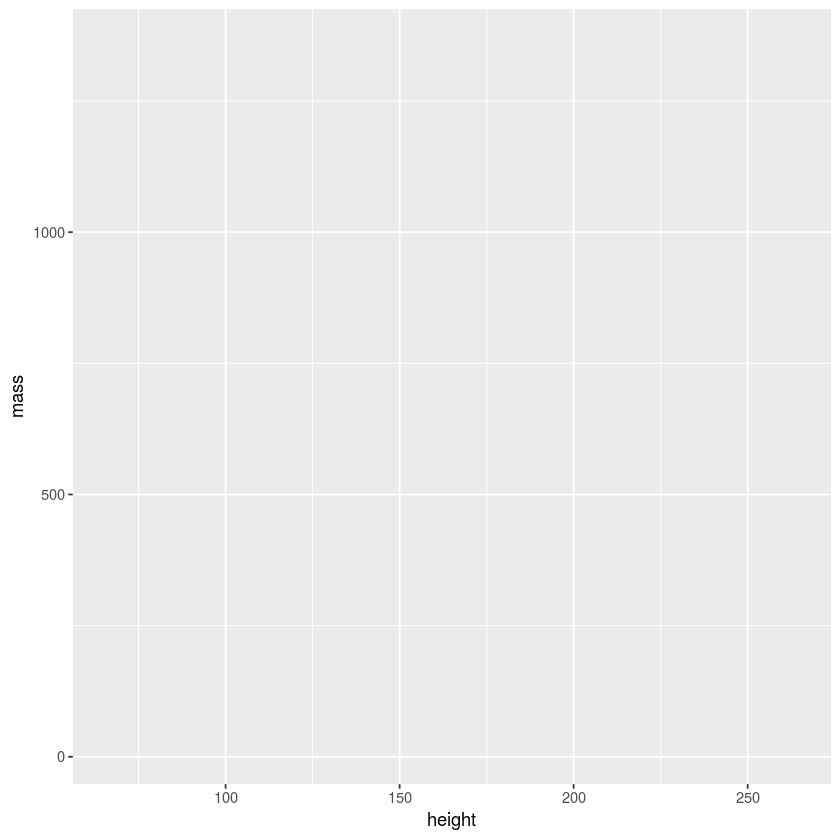

In [47]:
library(ggplot2)
ggplot(starwars,aes(x=height,y=mass))

## Geometries
- The base `ggplot` function sets up the graph and creates a ggplot object, but doesn't produce anything visually
- We need to specify how we want to display our data using geometries
    - geom_point
    - geom_boxplot
    - geom_histogram
    - geom_dist
- Geometries, and every other specification in ggplot2 is done by adding to the original ggplot call

Warning message:
: Removed 28 rows containing missing values (geom_point).

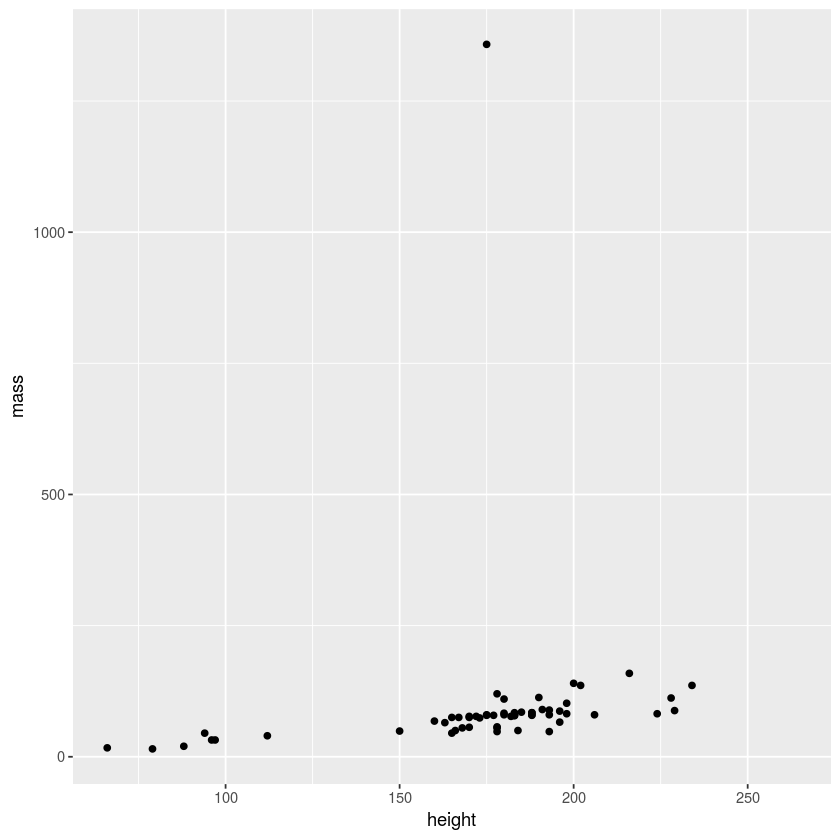

In [48]:
ggplot(starwars,aes(x=height,y=mass)) + geom_point()

ERROR: Error: stat_bin() must not be used with a y aesthetic.


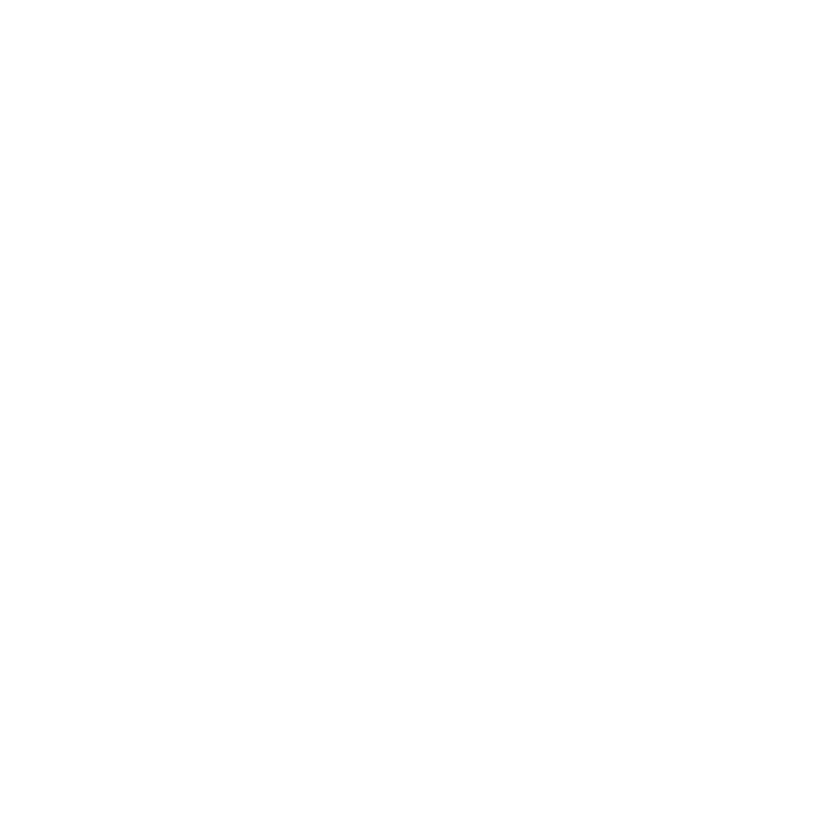

In [49]:
ggplot(starwars,aes(x=height,y=mass)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 6 rows containing non-finite values (stat_bin).`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 28 rows containing non-finite values (stat_bin).

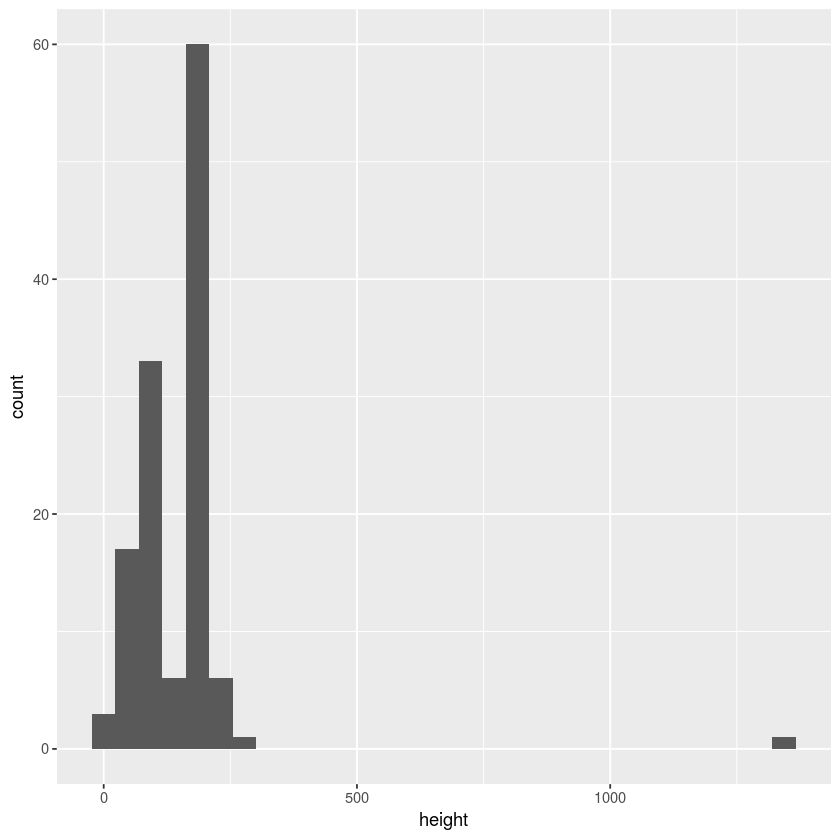

In [50]:
ggplot(starwars) + geom_histogram(aes(height)) +
geom_histogram(aes(mass))

Warning message:
: Removed 6 rows containing non-finite values (stat_density).Warning message:
: Removed 28 rows containing non-finite values (stat_density).

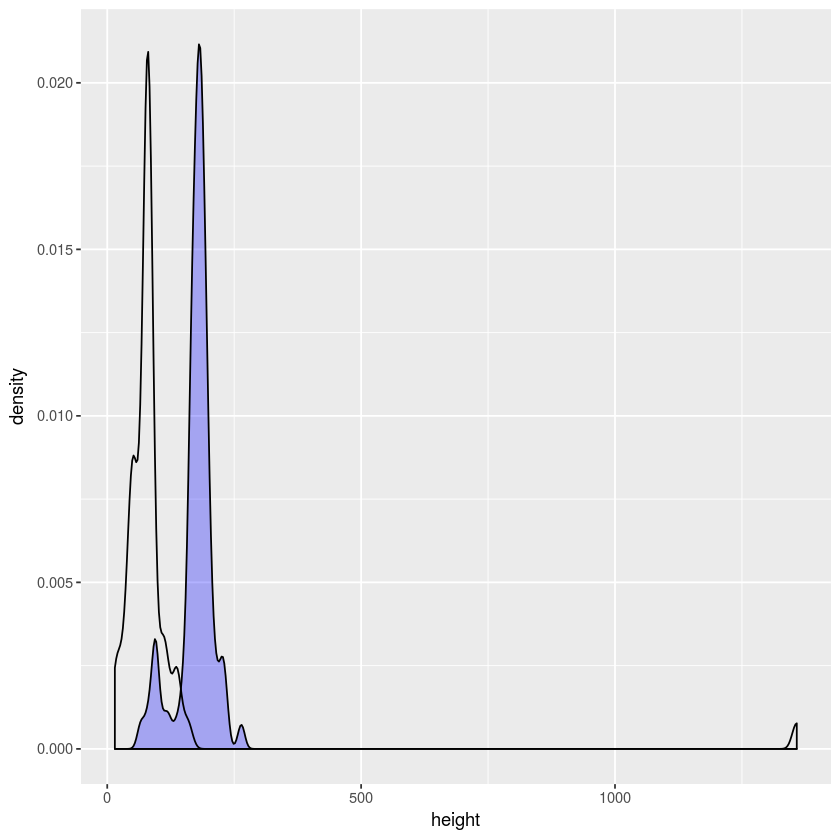

In [56]:
ggplot(starwars) + geom_density(aes(height),fill="blue",alpha=0.3) + 
geom_density(aes(mass))

Warning message:
: Removed 28 rows containing missing values (geom_point).

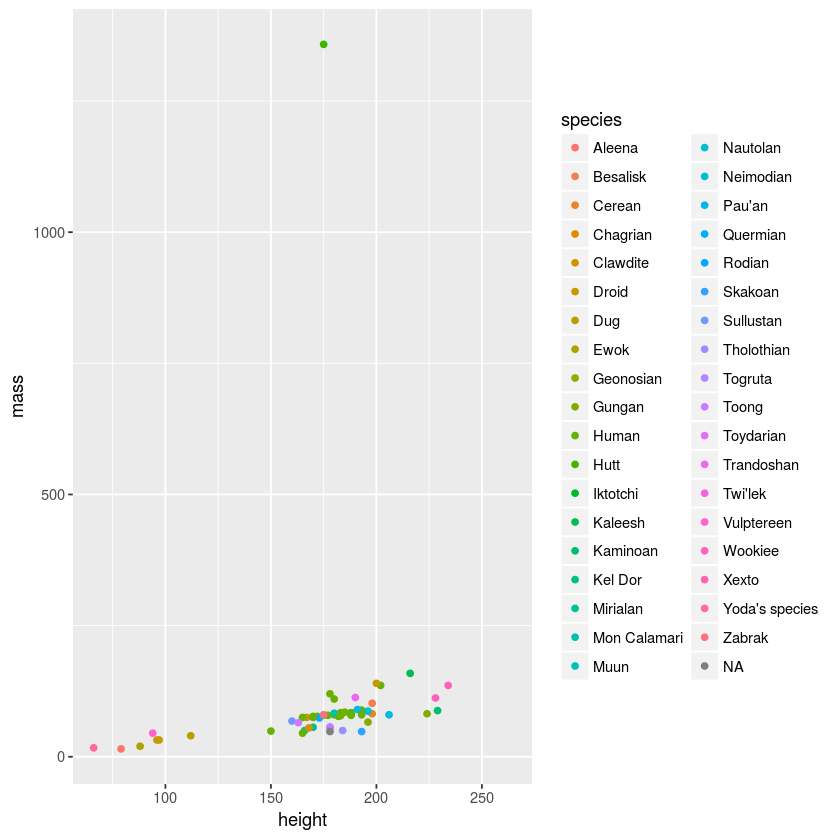

In [57]:
ggplot(starwars,aes(x=height,y=mass,color=species)) +
geom_point()

In [58]:
interesting <- (starwars %>% 
         filter(!is.na(species)) %>%
             group_by(species) %>% 
             summarize(count = n()) %>% 
             filter(count > 2))$species
print(interesting)
to_vis <- starwars %>% 
    filter(species %in% interesting)

[1] "Droid"  "Gungan" "Human" 


Warning message:
: Removed 5 rows containing non-finite values (stat_ydensity).

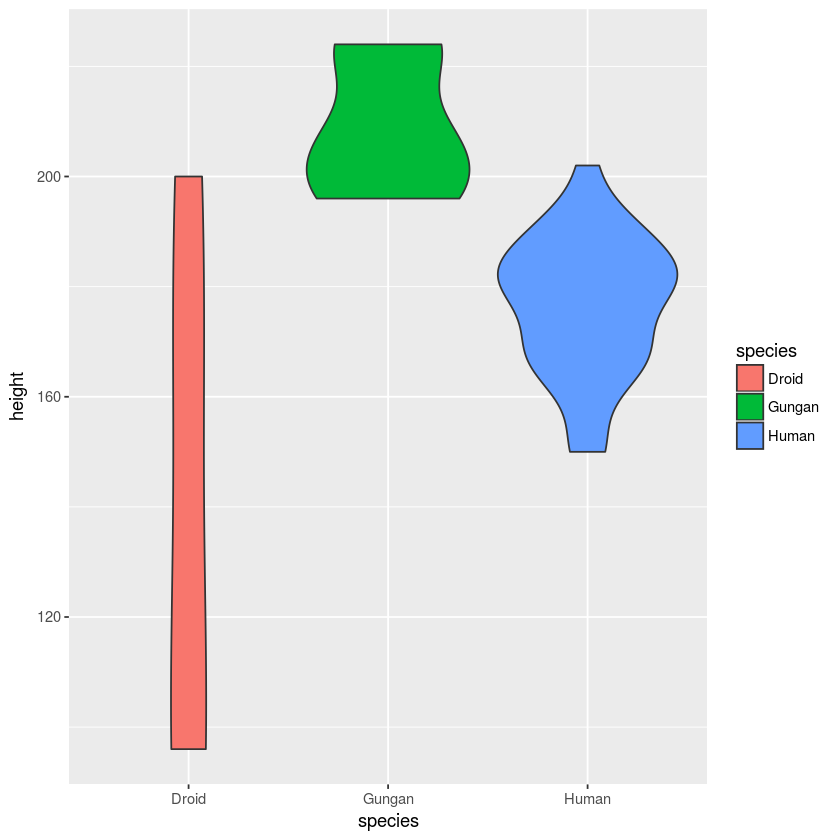

In [59]:
base_plot <- ggplot(to_vis,aes(x=species,fill=species,y=height))
base_plot + geom_violin()

## Modifying Other Aspects
- `ggplot` has a function for almost every aspect of a graphs appearance
- To add titles, use the functions
    - xlabs, ylabs, ggtitle, labs
- To modify area shown, use
    - xlim, ylim, lims
- To modify colors use one of the `scale_` functions

Warning message:
: Removed 28 rows containing missing values (geom_point).

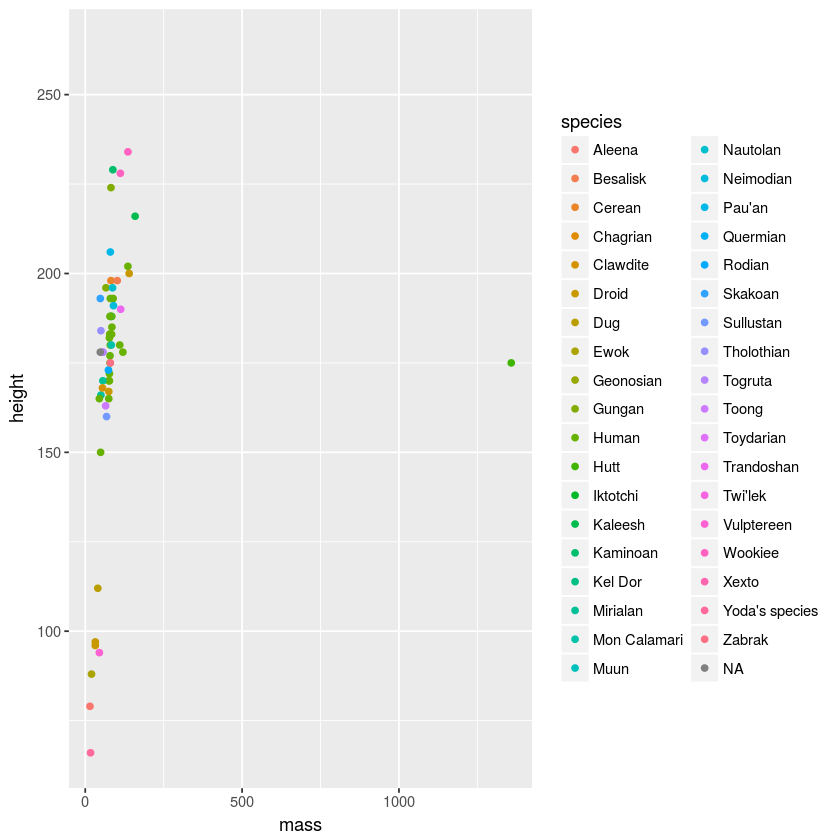

In [61]:
base_plot2 <- ggplot(starwars,aes(x=mass,y=height,color=species))
scatter <- base_plot2 + geom_point()
plot(scatter)

Warning message:
: Removed 28 rows containing missing values (geom_point).

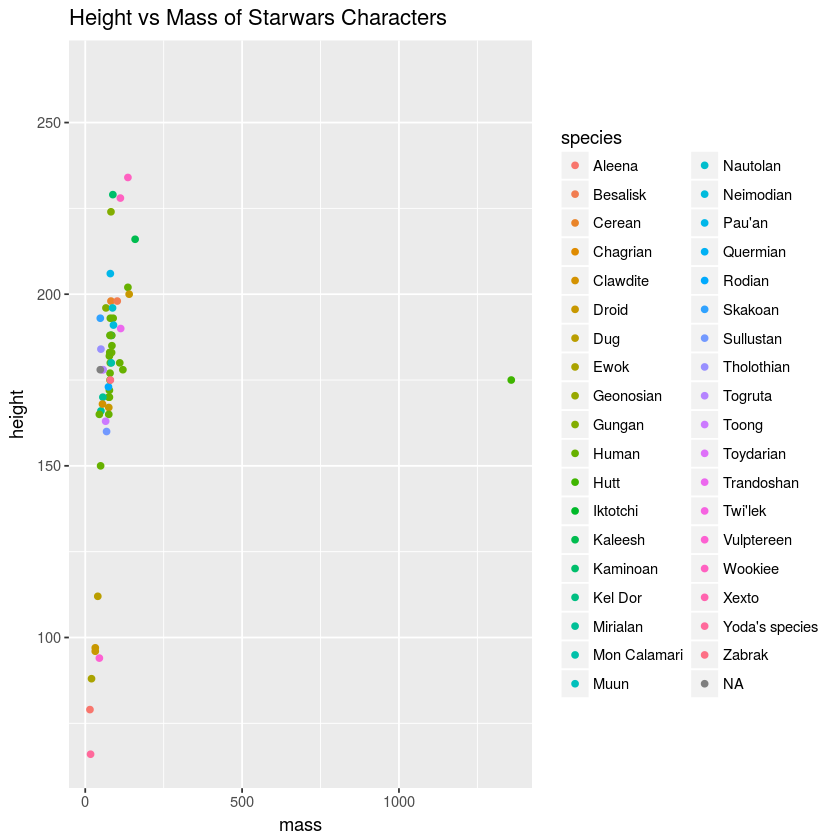

In [62]:
scatter + ggtitle("Height vs Mass of Starwars Characters")

Warning message:
: Removed 28 rows containing missing values (geom_point).

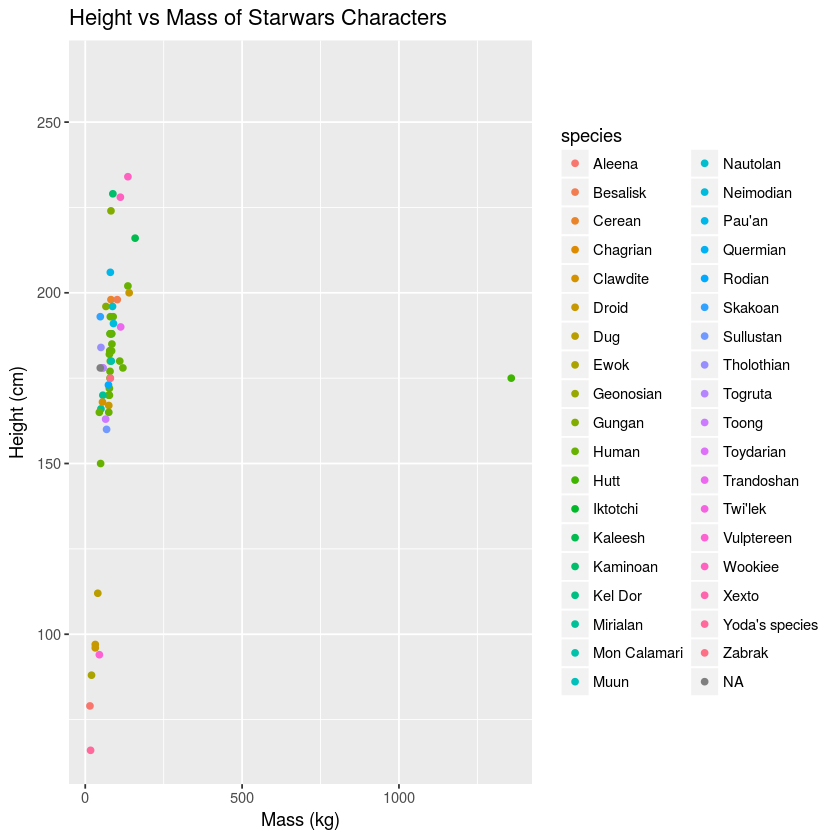

In [63]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)")

Warning message:
: Removed 29 rows containing missing values (geom_point).

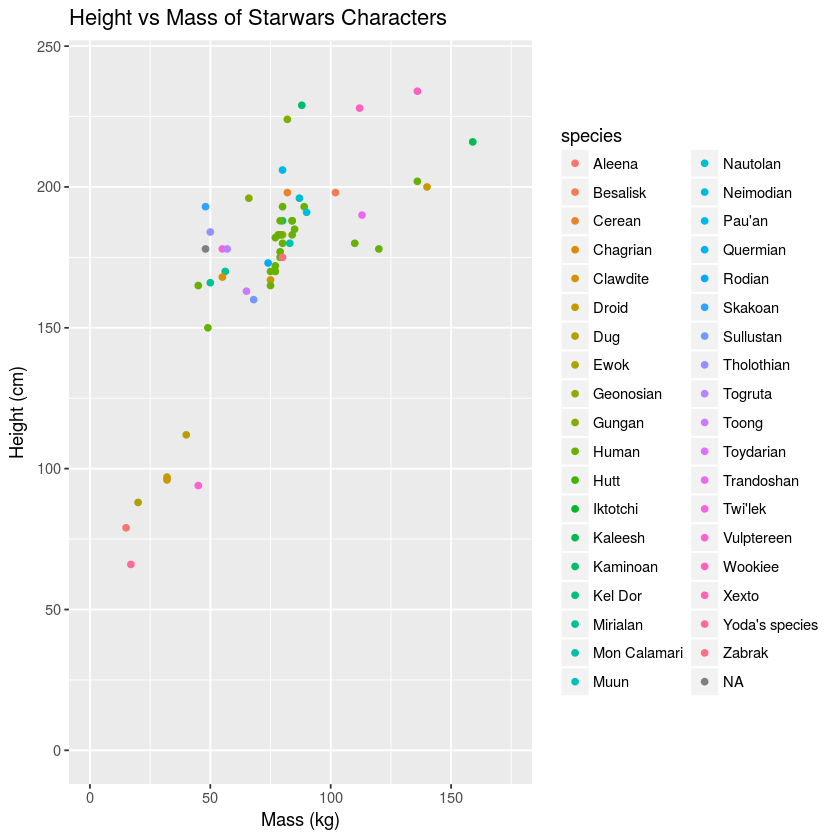

In [68]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)") + xlim(0,175) + 
ylim(0,240) 

Warning message:
: Removed 29 rows containing missing values (geom_point).

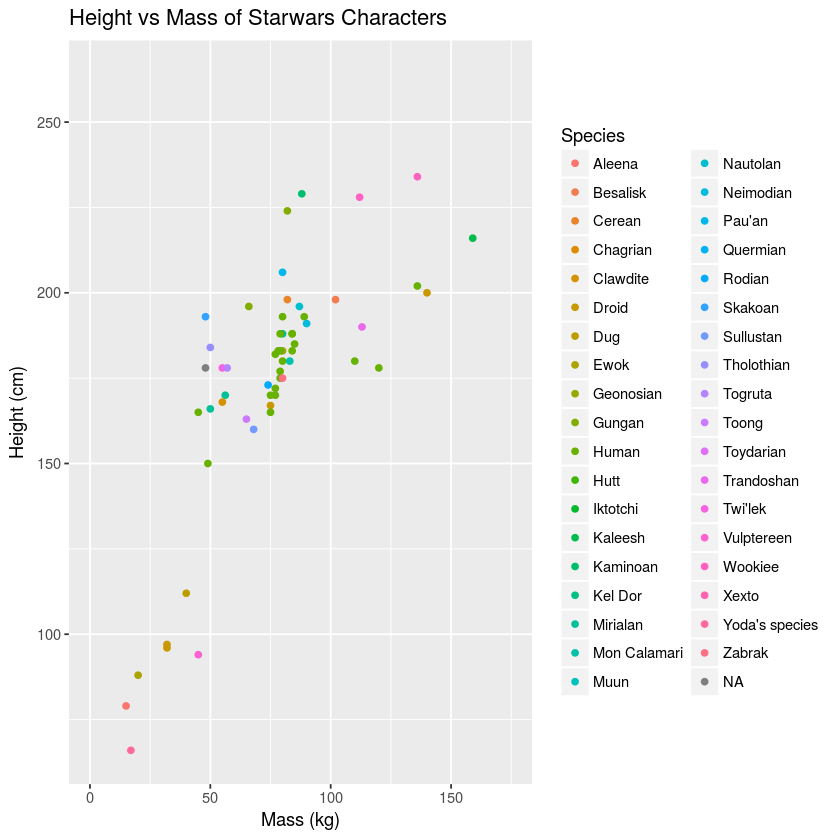

In [73]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)") + xlim(0,175) +
guides(color=guide_legend(title="Species"))

Warning message:
In RColorBrewer::brewer.pal(n, pal): n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
Warning message:
: Removed 76 rows containing missing values (geom_point).

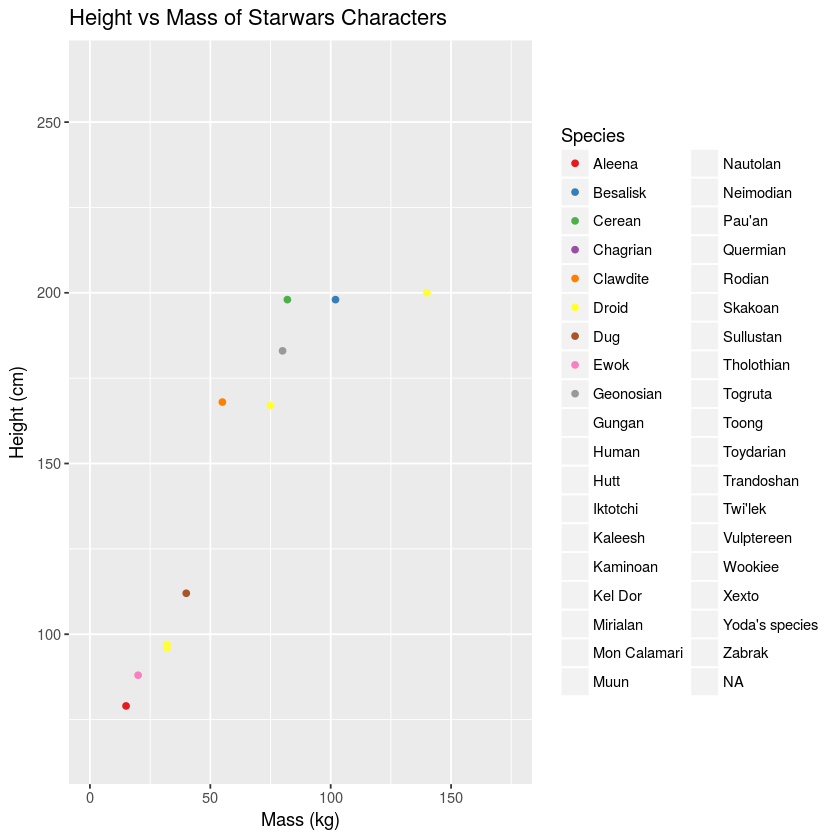

In [76]:
scatter + labs(title="Height vs Mass of Starwars Characters",
               x="Mass (kg)",y="Height (cm)") + xlim(0,175) +
guides(color=guide_legend(title="Species")) + 
scale_color_brewer(palette = "Set1")

## Themes
- Themes allow you to control things like font, gridline color, etc.
- The elements of the theme can be modified by using the `theme` function and passing the appropriate parameters
- More common is to download or use an existing theme, and add it to your plot using `+ theme_NAME`

Warning message:
: Removed 29 rows containing missing values (geom_point).

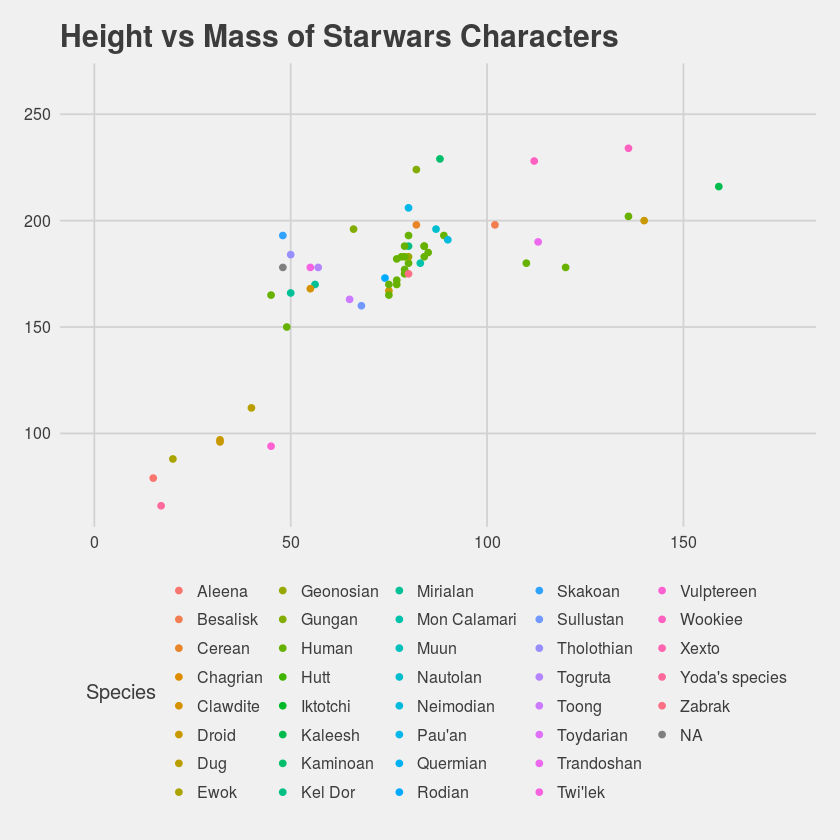

In [79]:
library(ggthemes)
almost_finished <- scatter + 
labs(title="Height vs Mass of Starwars Characters",
     x="Mass (kg)",y="Height (cm)") + 
xlim(0,175) + guides(color=guide_legend(title="Species"))
almost_finished + theme_fivethirtyeight()

Warning message:
: Removed 29 rows containing missing values (geom_point).

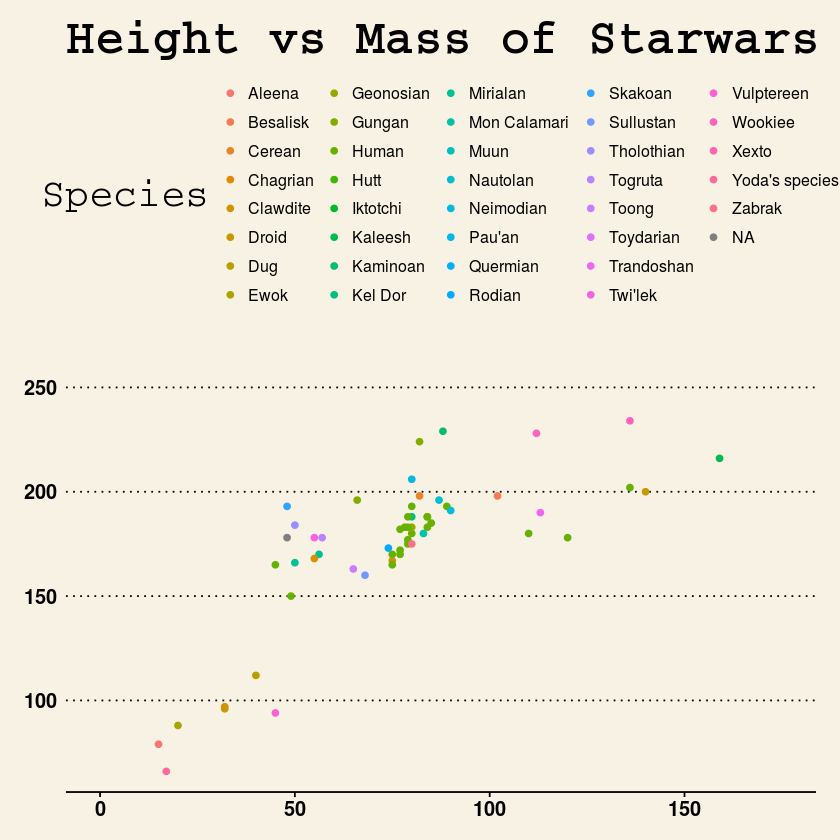

In [80]:
almost_finished + theme_wsj()

Warning message:
: Removed 29 rows containing missing values (geom_point).

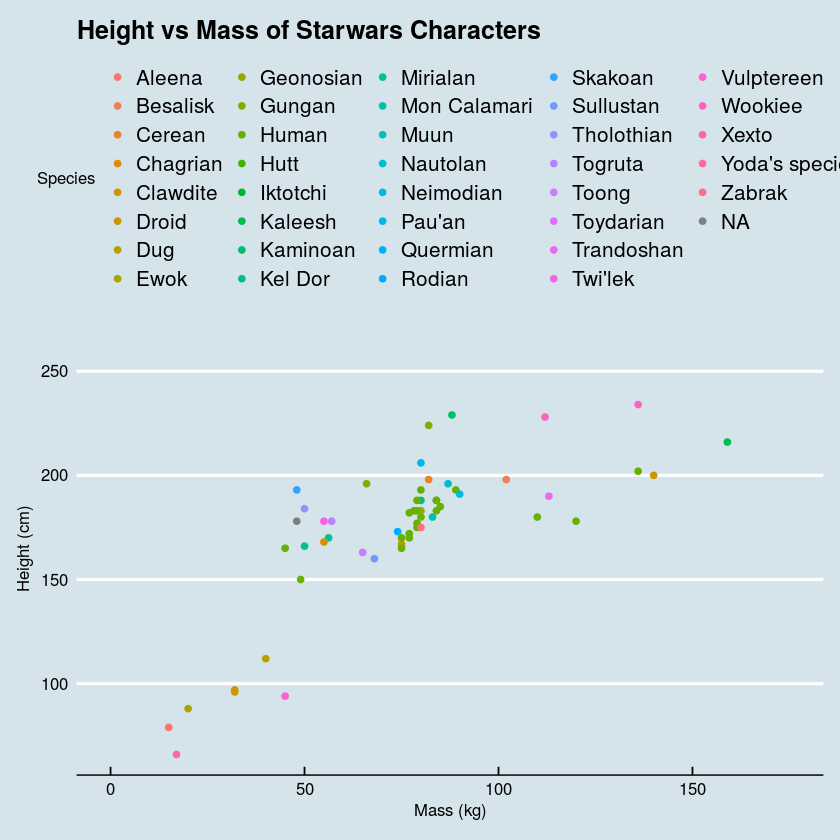

In [81]:
almost_finished + theme_economist()

Warning message:
: Removed 29 rows containing missing values (geom_point).

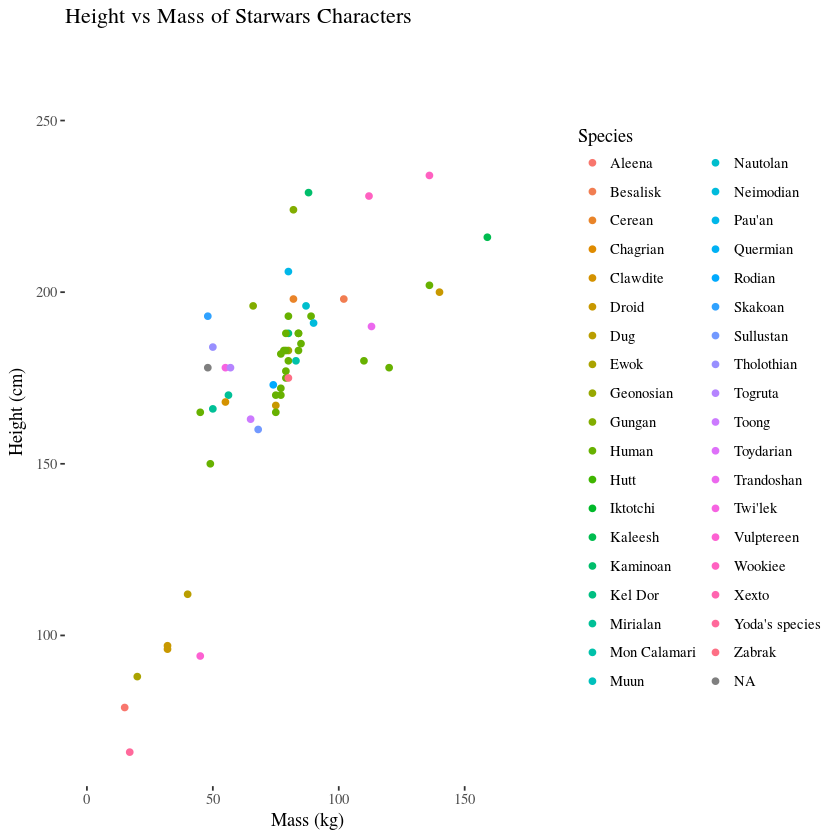

In [82]:
almost_finished + theme_tufte()

## Saving Plots
- While gpplot2 is very easy to use in a good R IDE, many times we want to share our plots
- The `ggsave` function by default will save the last plot to a given file location
- The type of file is guessed from the name, but if you want to specify it, use the device parameter
```R
    ggsave(file_name, plot = plot_var)
```

In [85]:
my_final_plot <- almost_finished + theme_fivethirtyeight()
ggsave("final_plot.pdf",dpi=600,width=10)

Saving 10 x 7 in image
Warning message:
: Removed 29 rows containing missing values (geom_point).